# predicting the quality of wine using classification methods
 ####  1)KNN
 ####  2)Decision Tree
 ####  3)Naive Bayes

### The Wine Quality Dataset that focuses on the Portuguese "Vinho Verde" Wine. The  datasets for white wine has 4898 entries over 12 features. The features are:
##### 	1 - fixed acidity
#### 	2 - volatile acidity
#### 	3 - citric acid
####    4 - residual sugar
####    5 - chlorides
####   	6 - free sulfur dioxide
#### 	7 - total sulfur dioxide
#### 	8 - density
#### 	9 - pH
#### 	10 - sulphates
#### 	11 - alcohol
#### 	12 - quality (score between 0 and 10)
##### The quality of the wine, the dependent variable, is a classification marking on the label (range between 1 -10) and is identified by patrons. 




### >>Exploring and data processing
#### >Import wine data

In [1]:
#importing packages
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [2]:
data=pd.read_csv("wine_data.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#shape of the dataframe
data.shape

(4898, 12)

In [5]:
#datatypes of dataframe
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### missing value treatment

In [7]:

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#phew! there's no missing values.

## exploratory data analysis(EDA)

In [9]:
#changing column names
data1 = pd.read_csv("wine_data.csv")
data1.columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','ph','sulphates','alcohol','quality']

In [10]:
data1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


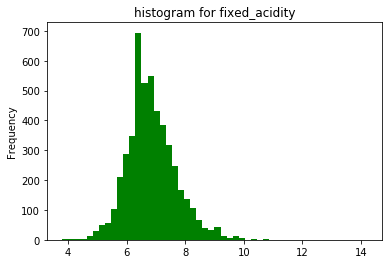

In [11]:
data1.fixed_acidity.plot(kind='hist', title='histogram for fixed_acidity', color='green',bins=50)
#histogram shows its a normal distribution,any ways lets go to boxplot

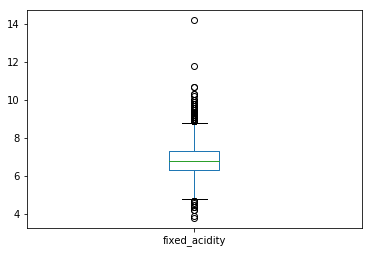

In [12]:
data1.fixed_acidity.plot(kind='box') #has out laiers

In [13]:
data1['fixed_acidity'].describe()

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed_acidity, dtype: float64

In [14]:
#removing the outliar
data1 = data1.drop(data1[data1['fixed_acidity']==14.2].index, axis=0)
data1.shape

(4897, 12)

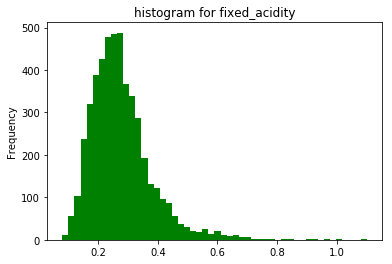

In [15]:
data1.volatile_acidity.plot(kind='hist', title='histogram for fixed_acidity', color='green',bins=50)

In [16]:
data1['volatile_acidity'].describe()

count    4897.000000
mean        0.278243
std         0.100805
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile_acidity, dtype: float64

In [17]:
#removing out laiers
data1 = data1.drop(data1[data1['volatile_acidity']==1.1].index, axis=0)
data1.shape

(4896, 12)

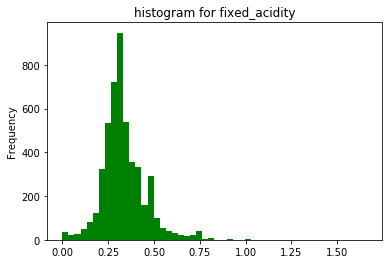

In [18]:
data1.citric_acid.plot(kind='hist', title='histogram for fixed_acidity', color='green',bins=50)

In [19]:
data1['citric_acid'].describe()

count    4896.000000
mean        0.334195
std         0.120998
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric_acid, dtype: float64

In [20]:
#removing out laiers
data1 = data1.drop(data1[data1['citric_acid']>1].index, axis=0)
data1.shape

(4894, 12)

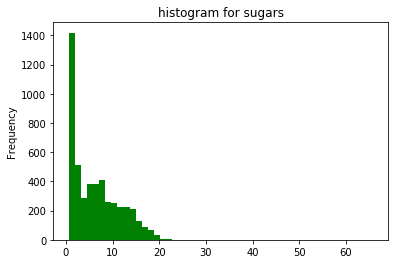

In [21]:
data1.residual_sugar.plot(kind='hist', title='histogram for sugars', color='green',bins=50)

In [22]:
data1['residual_sugar'].describe()

count    4894.000000
mean        6.394146
std         5.073050
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual_sugar, dtype: float64

In [23]:
data1 = data1.drop(data1[data1['residual_sugar']>30].index, axis=0)
data1.shape

(4891, 12)

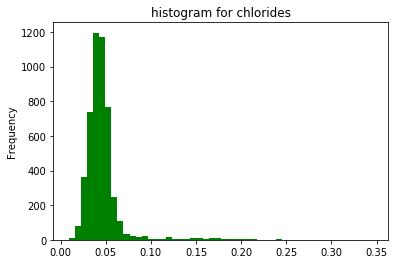

In [24]:
data1.chlorides.plot(kind='hist', title='histogram for chlorides', color='green',bins=50)

In [25]:
data1['chlorides'].describe()

count    4891.000000
mean        0.045775
std         0.021855
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

In [26]:
#removal of outliers
data1 = data1.drop(data1[data1['chlorides']==0.346].index, axis=0)
data1.shape

(4891, 12)

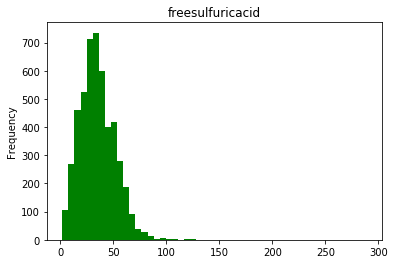

In [27]:
data1.free_sulfur_dioxide.plot(kind='hist', title='freesulfuricacid', color='green',bins=50)

In [28]:
data1['free_sulfur_dioxide'].describe()

count    4891.000000
mean       35.316909
std        17.008817
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64

In [29]:
#removal of outliers
data1 = data1.drop(data1[data1['free_sulfur_dioxide']==289].index, axis=0)
data1.shape

(4890, 12)

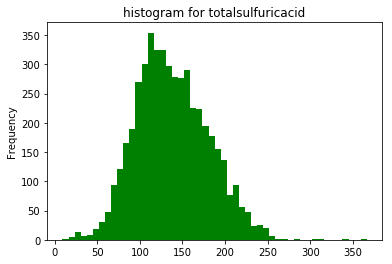

In [30]:
data1.total_sulfur_dioxide.plot(kind='hist', title='histogram for totalsulfuricacid', color='green',bins=50)

In [31]:
data1['total_sulfur_dioxide'].describe()

count    4890.000000
mean      138.254908
std        42.242368
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       366.500000
Name: total_sulfur_dioxide, dtype: float64

In [32]:
#removal of outliers
data1 = data1.drop(data1[data1['total_sulfur_dioxide']==366.5].index, axis=0)
data1.shape

(4889, 12)

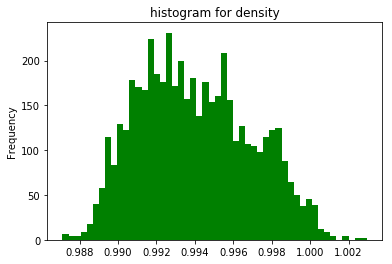

In [33]:
data1.density.plot(kind='hist', title='histogram for density', color='green',bins=50)

In [34]:
data1['density'].describe()

count    4889.000000
mean        0.994013
std         0.002903
min         0.987110
25%         0.991730
50%         0.993740
75%         0.996100
max         1.002950
Name: density, dtype: float64

In [35]:
#no outliers for this


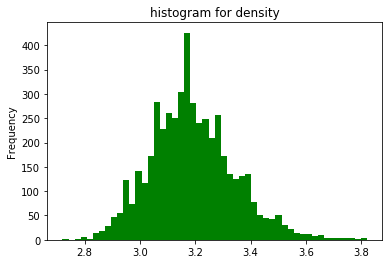

In [36]:
data1.ph.plot(kind='hist', title='histogram for density', color='green',bins=50)

In [37]:
data1['ph'].describe()#seems like normal distubution

count    4889.000000
mean        3.188212
std         0.151013
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: ph, dtype: float64

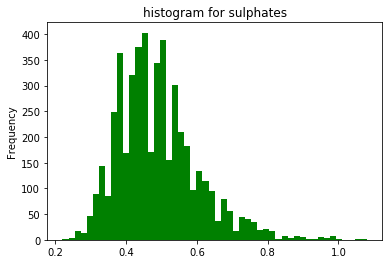

In [38]:
data1.sulphates.plot(kind='hist', title='histogram for sulphates', color='green',bins=50)

In [39]:
data1['sulphates'].describe()

count    4889.000000
mean        0.489785
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

In [40]:
#removal of outliers
data1 = data1.drop(data1[data1['sulphates']==1.08].index, axis=0)
data1.shape

(4888, 12)

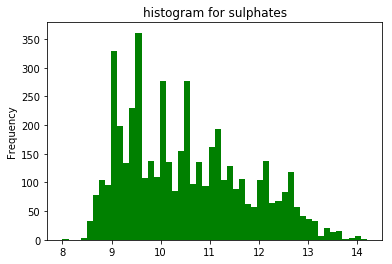

In [41]:
data1.alcohol.plot(kind='hist', title='histogram for sulphates', color='green',bins=50)

In [42]:
data1['alcohol'].describe()

count    4888.000000
mean       10.512915
std         1.229915
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

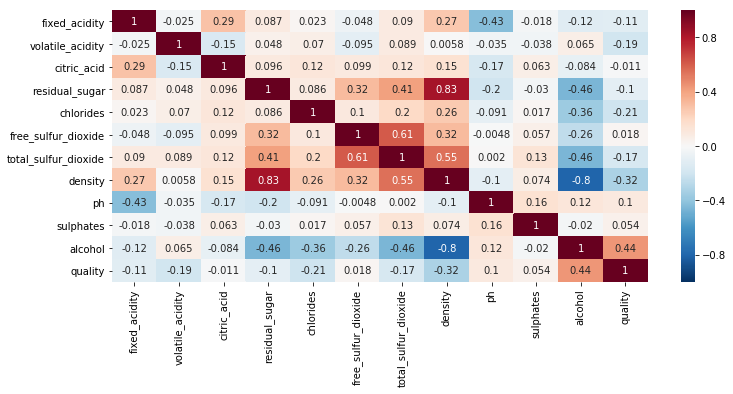

In [43]:
##corr heat map for whole dataframe
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
correlation = data1.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [44]:
data1.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.024542,0.291428,0.087370,0.023348,-0.047982,0.089695,0.270015,-0.428740,-0.017530,-0.122783,-0.114808
volatile_acidity,-0.024542,1.000000,-0.152813,0.047916,0.069927,-0.094851,0.088851,0.005761,-0.035344,-0.038150,0.065347,-0.192475
citric_acid,0.291428,-0.152813,1.000000,0.095974,0.119204,0.099497,0.120828,0.154703,-0.166521,0.062857,-0.083954,-0.010914
residual_sugar,0.087370,0.047916,0.095974,1.000000,0.086114,0.318684,0.409686,0.832064,-0.200319,-0.029596,-0.459450,-0.099765
chlorides,0.023348,0.069927,0.119204,0.086114,1.000000,0.104126,0.200193,0.259714,-0.090663,0.017297,-0.360086,-0.210288
free_sulfur_dioxide,-0.047982,-0.094851,0.099497,0.318684,0.104126,1.000000,0.613557,0.316921,-0.004845,0.056776,-0.256240,0.017718
total_sulfur_dioxide,0.089695,0.088851,0.120828,0.409686,0.200193,0.613557,1.000000,0.547124,0.001980,0.134097,-0.455213,-0.168942
density,0.270015,0.005761,0.154703,0.832064,0.259714,0.316921,0.547124,1.000000,-0.099702,0.074132,-0.804532,-0.317455
ph,-0.428740,-0.035344,-0.166521,-0.200319,-0.090663,-0.004845,0.001980,-0.099702,1.000000,0.155615,0.121370,0.100675
sulphates,-0.017530,-0.038150,0.062857,-0.029596,0.017297,0.056776,0.134097,0.074132,0.155615,1.000000,-0.019841,0.054297


C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


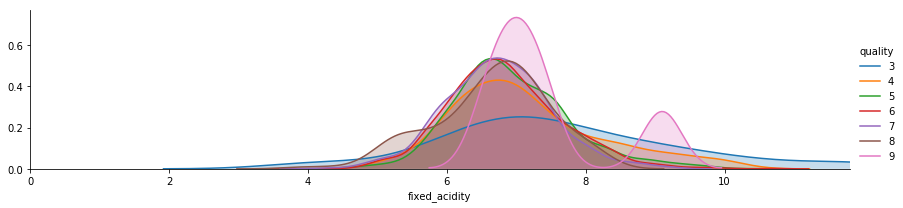

In [45]:
## facet maps
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'fixed_acidity',shade= True)
facet.set(xlim=(0, data1['fixed_acidity'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


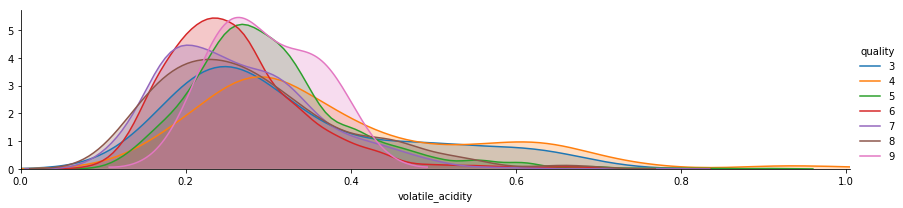

In [46]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'volatile_acidity',shade= True)
facet.set(xlim=(0, data1['volatile_acidity'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


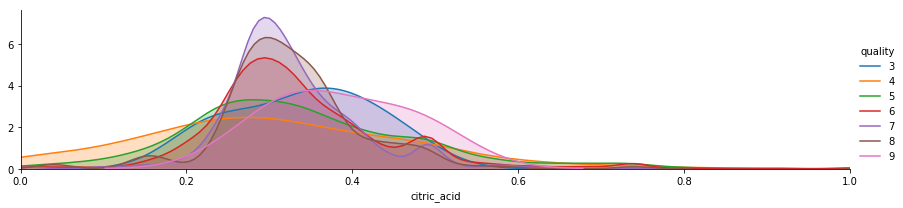

In [47]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'citric_acid',shade= True)
facet.set(xlim=(0, data1['citric_acid'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


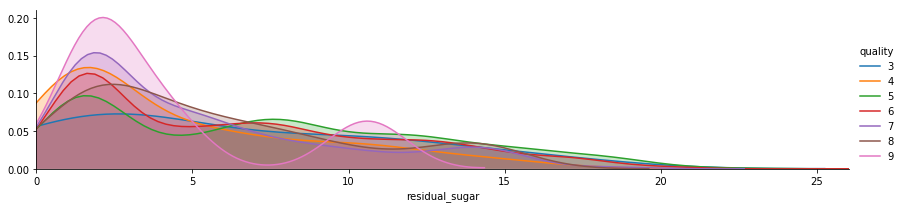

In [48]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'residual_sugar',shade= True)
facet.set(xlim=(0, data1['residual_sugar'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


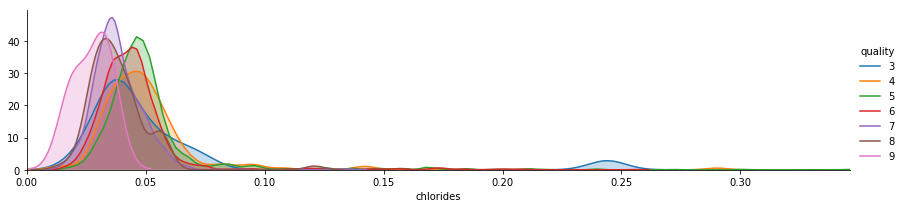

In [49]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'chlorides',shade= True)
facet.set(xlim=(0, data1['chlorides'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


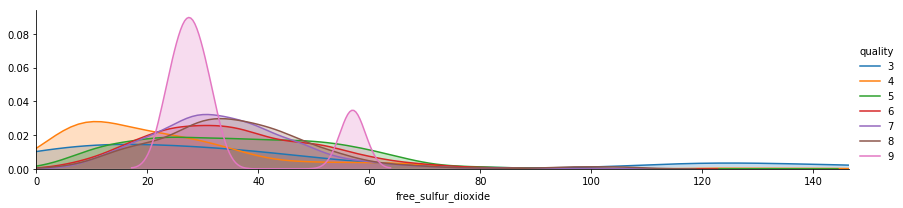

In [50]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'free_sulfur_dioxide',shade= True)
facet.set(xlim=(0, data1['free_sulfur_dioxide'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


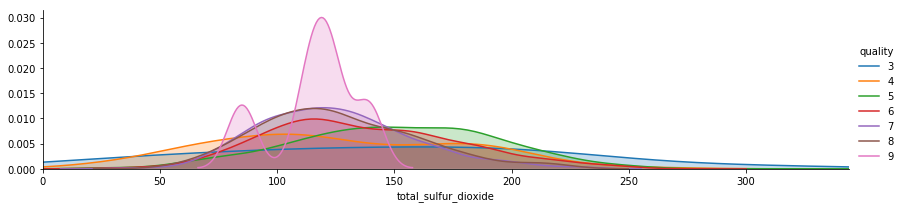

In [51]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'total_sulfur_dioxide',shade= True)
facet.set(xlim=(0, data1['total_sulfur_dioxide'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


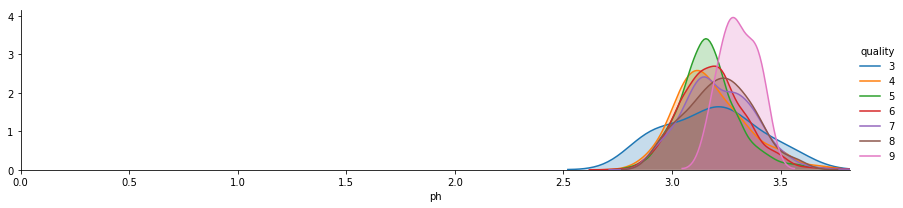

In [52]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'ph',shade= True)
facet.set(xlim=(0, data1['ph'].max()))
facet.add_legend();

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


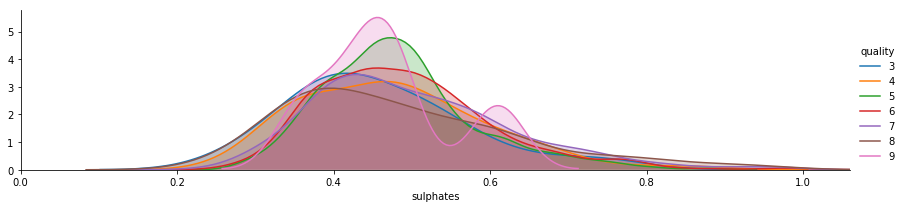

In [53]:
facet = sns.FacetGrid(data1, hue="quality",aspect=4)
facet.map(sns.kdeplot,'sulphates',shade= True)
facet.set(xlim=(0, data1['sulphates'].max()))
facet.add_legend();

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol levels in diff wines')]

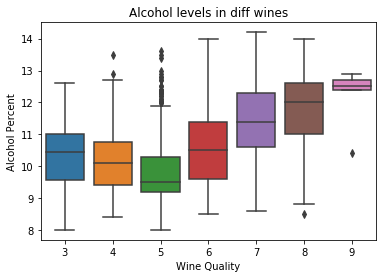

In [54]:
#it is known that the quality of alcohol depends upon the quantity of alcohol present
bx = sns.boxplot(x="quality", y='alcohol', data = data)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol levels in diff wines')

## implementing modles

In [55]:
##applying z_scores
data_z=data.apply(zscore)
data_z.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


## spliting the data train,test

In [56]:
 features= data1[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','ph','sulphates','alcohol']]


label = np.array(data1['quality'])

In [57]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [58]:
X_train.shape

(3910, 11)

In [59]:
X_test.shape

(978, 11)

In [60]:
y_train.shape

(3910,)

In [61]:
y_test.shape

(978,)

## KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [63]:
NNH = KNeighborsClassifier(n_neighbors= 65,weights='uniform',p=3)
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=65, p=3,
           weights='uniform')

In [64]:
predicted_labels = NNH.predict(X_test)
accuracy_score_knn= accuracy_score(y_test, predicted_labels)
print(accuracy_score_knn)


0.44171779141104295


## Naive Bayes

In [65]:
#Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

print("2. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  43.04703476482617%

2. Confusion Matrix: 
[[  1   2   1   0   1   0   0]
 [  1   8  10   6   3   0   0]
 [  5  14 139 104  30   0   0]
 [  2   3 135 150 144   1   1]
 [  0   1  17  29 121   5   6]
 [  0   0   2   9  24   2   0]
 [  0   0   0   1   0   0   0]]


## Decision Tree

In [66]:
DTClassifier= DecisionTreeClassifier (max_depth=20, min_samples_split =5,criterion='gini',min_samples_leaf=2)
DTClassifier.fit(X_train,y_train)
predicted_labels = DTClassifier.predict(X_train)
predicted_labels 
 #oops i got almost 90% even with 6 responces.
# defenetly a good classifier i say but donno wheather it overfits.

array([6, 4, 5, ..., 6, 7, 6], dtype=int64)

In [67]:
np.array(y_train)

array([6, 4, 5, ..., 6, 7, 7], dtype=int64)

In [68]:
accuracy_scoree = accuracy_score(y_train,predicted_labels)
print(accuracy_scoree)

0.8930946291560102


### to get more accuracy ,i map responce varibales to discrete(good,bad,avg)

In [69]:
#as the accuracy is very low,we need to categorize good,average,bad
conditions = [
    (data1['quality'] >= 7),
    (data1['quality'] <= 4)
]
rating = ['good', 'bad']
data1['rating'] = np.select(conditions, rating, default='average')
data.rating.value_counts()

AttributeError: 'DataFrame' object has no attribute 'rating'

In [70]:
data1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average


In [71]:
data2 = data1.drop('quality', axis = 1)
lebel= data1['rating']
y=lebel

In [72]:
data2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average


In [73]:
features=data2.drop('rating', axis = 1)
features.head()
X=features

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, lebel, test_size=0.2, random_state=0)


In [75]:
NNH = KNeighborsClassifier(n_neighbors=36,leaf_size=5, metric='minkowski',p=1)
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
accuracy_score_knn= accuracy_score(y_test, predicted_labels)
print(accuracy_score_knn)




0.7505112474437627


## gridsearch

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# define the parameter values that should be searched
k_range = list(range(1, 40))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [78]:
# create a parameter grid to map
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.72597137 0.73415133 0.73006135 0.71165644 0.73619632 0.74642127
 0.66462168 0.69529652 0.70756646 0.66324435]


In [80]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [81]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.66243863 0.71358429 0.69435352 0.71685761 0.71153846 0.72176759
 0.7158347  0.71951718 0.71788052 0.72667758 0.72217676 0.72708674
 0.724018   0.72933715 0.72442717 0.73261047 0.73220131 0.73772504
 0.73608838 0.73711129 0.73506547 0.73711129 0.73342881 0.73649755
 0.73915712 0.74018003 0.73874795 0.73792962 0.73711129 0.74140753
 0.73711129 0.73956628 0.73854337 0.74099836 0.73977087 0.74181669
 0.73956628 0.74099836 0.74018003]


Text(0,0.5,'Cross-Validated Accuracy')

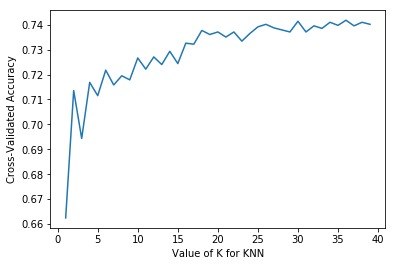

In [82]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [83]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7418166939443536
{'n_neighbors': 36}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=36, p=2,
           weights='uniform')


## Naive Bayes

In [84]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

print("2. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  70.24539877300614%

2. Confusion Matrix: 
[[514  22 192]
 [ 17  12   4]
 [ 54   2 161]]


## Decision tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
DTClassifier= DecisionTreeClassifier (max_depth=20, min_samples_split =5,criterion='gini',min_samples_leaf=2)
DTClassifier.fit(X_train,y_train)
predicted_labels = DTClassifier.predict(X_train)
accuracy_score = accuracy_score(y_train, predicted_labels)
print(accuracy_score) ## notice that it is the accuracy value for sub categorized good,bad and avg

0.9485933503836317


In [87]:
##Comments on variables
# 1) they are continous,corralated with eachother slightly


##outlier treatment
# 2)yes they are outlier in each feature or predictor.they are removed to get accuracy


##Does it make a business case to predict the quality of the wine?
# 3)ofc it makes sense to business case.By predicting the quality the business can make even better wine by changing the feature propositions


##Are we able to classify the type of wine given the predictors?
# yes ,we can able to classify with less accuracy,unfortunatly i got 90% in decision tree classifier.

##Best classifier
# i think decision classifier overfits the model,and by other classifiers ther's a lw accuracy.
#i dont think its helpful since they are many responce variables.which leads difficult to predict

